## Zadanie projektowe nr 2
#### Przetwarzanie tekstu i analiza opinii

# ile sie udalo zebrac tweetow z kazdej z części

#### Funkcja do pobierania tweetów, pobiera 600 tweetów z danego okresu.

In [5]:
import pandas as pd
import snscrape.modules.twitter as sns

def get_tweets(start_day, end_day):
    query = f'(#SpiderManNoWayHome) lang:en until:{end_day} since:{start_day}'
    tweets = []
    limit = 600

    for tweet in sns.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.content])

    return pd.DataFrame(tweets, columns=['Date', 'Tweet'])

#### Funkcja oceniająca czy dane wyrażenie jest pozytywne, czy negatywne.

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

### Analiza nr 1:
##### Bierzemy tweety z zakresu 2021-08-23 - 2022-01-16
##### i analizujemy ilość pozytywnych /negatywnych tweetów.
##### Tweety z hashtagiem "#SpiderManNoWayHome".
---
##### * "2021-08-23" -> wypuszczenie pierwszego trailera
##### * "2021-12-17" -> premiera filmu

#### Tworzymy listę dat z analizowanego przedziału czasowego.
#### 4 miesiące i 24 dni, analizujemy co 4 dzień.

In [92]:
from datetime import date

start_date = date(2021, 8, 23)
end_date = date(2022, 1, 16)

dates1 = pd.date_range(start_date, end_date ,freq='4d')

#### Pobieranie i zapisywanie tweetów do pliku csv.

In [99]:
from datetime import timedelta
# zakomentowane, żeby przypadkiem nie włączyło się pobieranie tweetów
# df_dates_with_tweets1 = pd.DataFrame(columns=['Date', 'Tweet'])

# for val in dates1:
#     start_date = val.date()
#     end_date = start_date + timedelta(days=1)
#
#     # pobieramy tweety z danego dnia
#     temp_tweets = get_tweets(start_date, end_date)
#
#     # dodajemy te tweety do dataFrama
#     df_dates_with_tweets1 = pd.concat([df_dates_with_tweets1, temp_tweets])
#
# print("done")
# df_dates_with_tweets1.to_csv('spiderTweets.csv')

done


#### Ilość pobranych tweetów: 18 294

#### Zliczanie pozytywnych i negatywnych tweetów na każdy dzień w naszej liście.

In [8]:
df_dates_with_tweets1 = pd.read_csv ('spiderTweets.csv')
df_dates1_emotion = pd.DataFrame(columns=['Date', 'Number of positive tweets', 'Number of negative tweets'])

# df_dates1_emotion uzupełniam datami z lista dat
for val in dates1:
    df_dates1_emotion.loc[len(df_dates1_emotion.index)] = [val.date(), 0, 0]

# iteruje po df_dates1_emotion by dla każdej daty znaleść liczbe pozytywnych i negatywnych tweetów
for index in df_dates1_emotion.index:
    temp_date = df_dates1_emotion.at[index, 'Date']

    # iteruje po tweetach i znajduje tweety z tego dnia
    for j in df_dates_with_tweets1.index:
        tweet_date = df_dates_with_tweets1.at[j, 'Date'].split(" ")[0]

        if temp_date.strftime("%Y-%m-%d") == tweet_date:
            # sprawdzamy czy tweet jest pozytywny czy negatywny

            curr_tweet = df_dates_with_tweets1.at[j, 'Tweet']
            result = sentiment_scores(curr_tweet)

            if result == "Positive":
                df_dates1_emotion.at[index, 'Number of positive tweets'] += 1
            elif result == "Negative":
                df_dates1_emotion.at[index, 'Number of negative tweets'] += 1

#### Wykres naszej analizy.

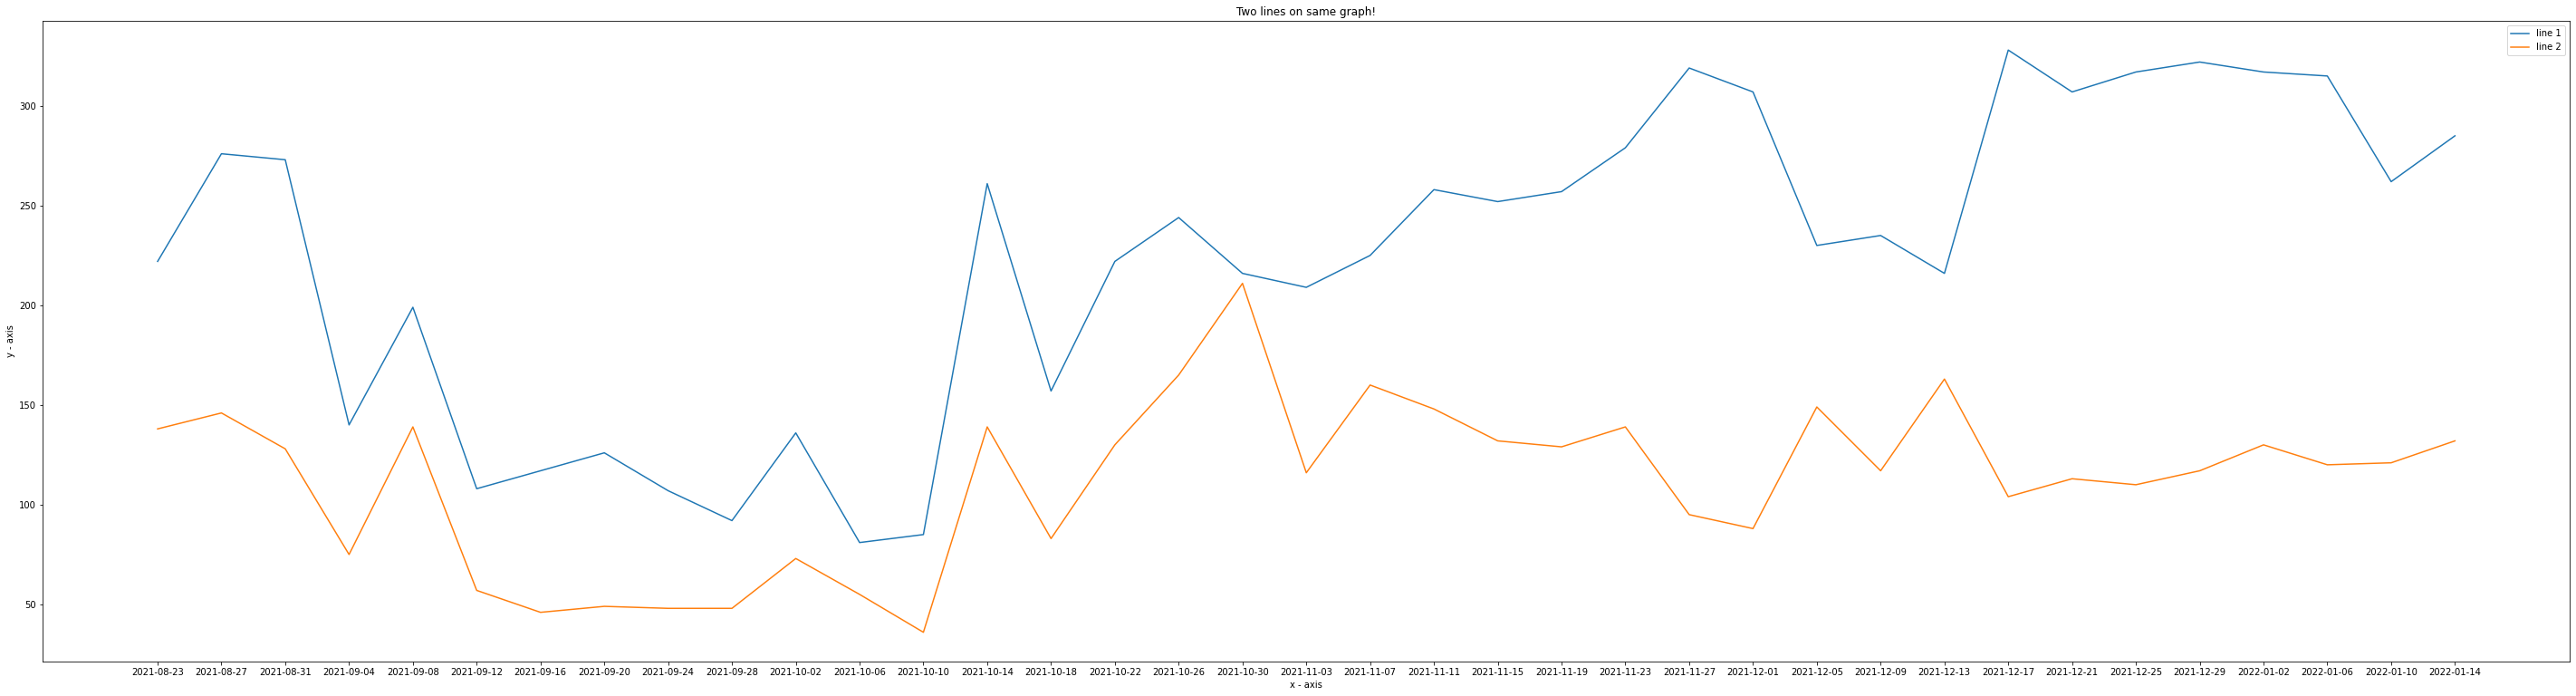

In [9]:
from matplotlib import pyplot as plt

np_arr = df_dates1_emotion.values
x = np_arr[:,0]

y_positive = np_arr[:,1]
y_negative = np_arr[:,2]

plt.figure(figsize=(50, 13))

plt.plot(x, y_positive, label = "line 1")
plt.plot(x, y_negative, label = "line 2")

plt.xlabel('x - axis')
plt.xticks(x)

plt.ylabel('y - axis')

plt.title('Two lines on same graph!')
plt.legend()
plt.savefig('plot.png')
plt.show()

#### "2021-08-23" -> wypuszczenie pierwszego trailera
#### "2021-10-12" -> artykuły o tym, że to ma być ostatni część trylogii
zacząłem googlać z ustawieniami konkretnego zakresu czasowego
#### "2021-10-18 - 2021-10-30" -> artykuły:
* pierwsze pogłoski o długości filmu.
* pierwsze pogłoski, że ma wystąpić w filmie "Tobey Maguire".
#### "2021-11-00 - 2021-11-10" -> artykuły:
* więcej informacji o tym, jakie postacie wystąpią.
* tym samym potwierdzenie multiwersum.
#### "2021-11-16" -> drugi trailer
#### "2021-12-17" -> premiera filmu

### Analiza nr 2.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.


#### Łączenie wszystkich tweetów w jeden tekst i tokenizowanie.

In [36]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    all_tweets_as_text += curr_tweet.lower()


import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

458191


##### Ilość słów: 458191

#### Filtrowanie słów(stopwords).

In [42]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch", "spider", "man", "movie", "maquire", "Movie", "movie", "think"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 164837


##### Ilość słów: 164837

#### Lematyzacja.

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#--------------------------------------------------------
lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

### Wykres z ilością słów.

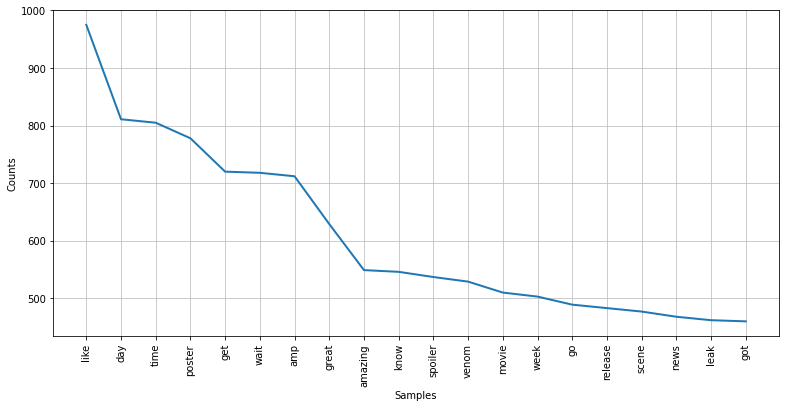

In [44]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

### Chmura tagów.

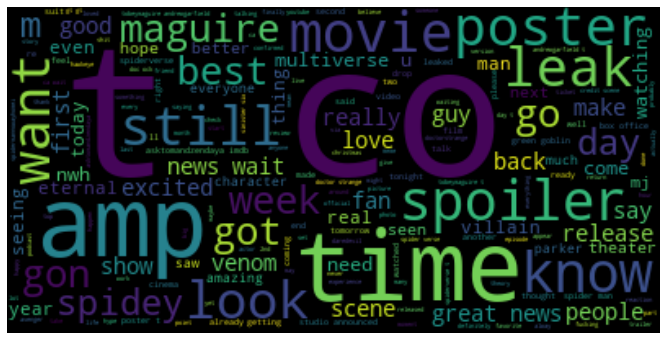

In [45]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analiza nr 3.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.
#### Ale teraz tylko dla pozytywnych tweetów.

#### Łączenie tweetów w jeden tekst i tokenizowanie.

In [46]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    result = sentiment_scores(curr_tweet)

    if result == "Positive":
        all_tweets_as_text += curr_tweet.lower()

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

246021


#### Ilość słów: 246021

#### Dla lepszego porównania filtrujemy z tych samych słów co poprzednio.

In [61]:
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch", "spider", "man", "movie", "maquire", "Movie", "movie", "think"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 88789


##### Ilość słów: 88 789

#### Lematyzacja.

In [62]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

### Wykres z ilością słów.

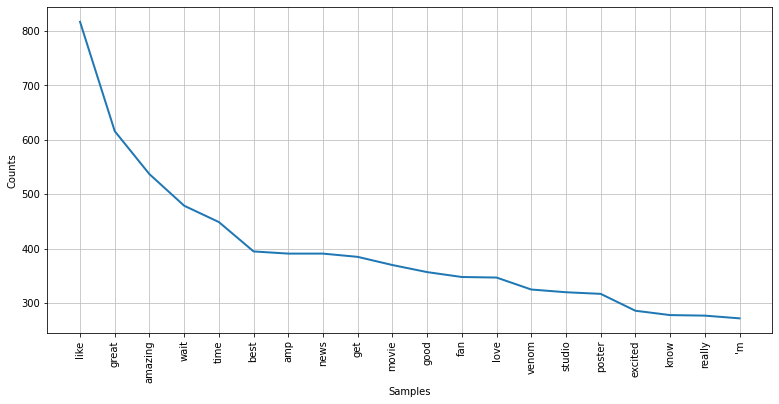

In [63]:
plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

#### Chmura tagów.

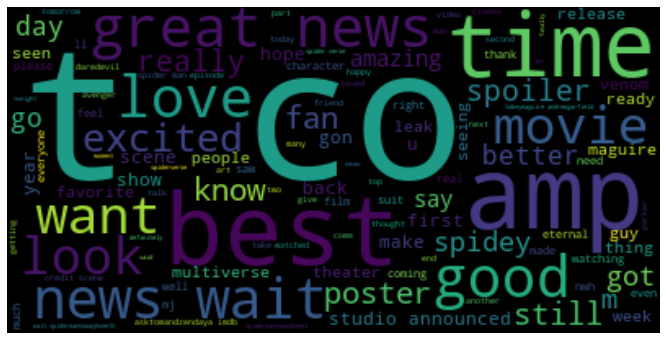

In [64]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analiza nr 4.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.
#### Ale teraz tylko dla negatywnych tweetów.

#### Łączenie tweetów w jeden tekst i tokenizowanie.

In [65]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    result = sentiment_scores(curr_tweet)

    if result == "Negative":
        all_tweets_as_text += curr_tweet.lower()

from nltk.tokenize import word_tokenize

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

109721


##### Ilość słów: 109721
#### Czyli negatywnych ogólnie było więcej.

#### Dla lepszego porównania filtrujemy z tych samych słów co poprzednio.

In [66]:
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch", "spider", "man", "movie", "maquire", "Movie", "movie", "think"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 39705


##### Ilość słów: 39 705

#### Lematyzacja.

In [67]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

#### Wykres z ilością słów.

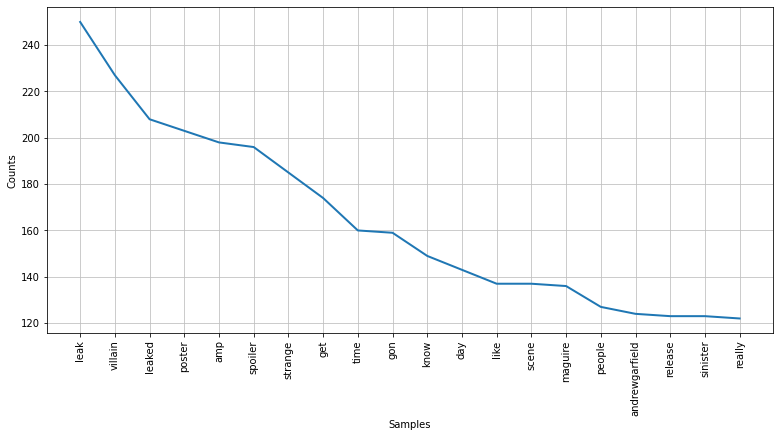

In [68]:
plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

#### Chmura tagów.

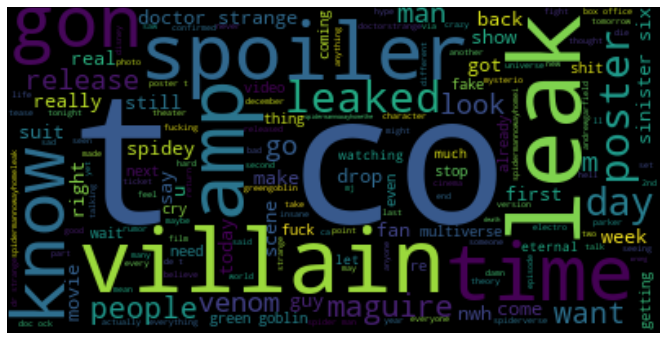

In [69]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analiza "Spider-Man: Far from Home" druga część serii.
#### Teraz tylko chmura tagów i wykres czasowy.

#### Funkcja pobierająca tweety.

In [47]:
def get_tweets2(start_day, end_day):
    query = f'(#SpiderManFarFromHome) lang:en until:{end_day} since:{start_day}'
    tweets = []
    limit = 600

    for tweet in sns.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.content])

    return pd.DataFrame(tweets, columns=['Date', 'Tweet'])

#### Tworzenie listy dat, które analizujemy
#### od 2019/1/15 -> pierwszy trailer
#### do 2019/6/26 -> premiera
#### 5 miesięcy 11 dni
#### czyli okres między pierwszym zwiastunem a premierą był dłuższy o około miesiąc

In [70]:
start_date = date(2019, 1, 15)
end_date = date(2019, 6, 26)

dates = pd.date_range(start_date, end_date ,freq='4d')

#### Pobieranie tweetów

In [52]:
# from datetime import timedelta
# # zakomentowane, żeby przypadkiem nie włączyło się pobieranie tweetów
# df_dates_with_tweets = pd.DataFrame(columns=['Date', 'Tweet'])
#
# for val in dates:
#     start_date = val.date()
#     end_date = start_date + timedelta(days=1)
#
#     # pobieramy tweety z danego dnia
#     temp_tweets = get_tweets2(start_date, end_date)
#
#     # dodajemy te tweety do dataFrama
#     df_dates_with_tweets = pd.concat([df_dates_with_tweets, temp_tweets])
#
# print("done")
# df_dates_with_tweets.to_csv('spiderTweets2.csv')

done


#### Ilość pobranych tweetów: 6 833
Udało się pobrać znacznie mniejszą ilość tweetów pomimo większej ilości dni między zwiastunem ,a premierą.
Oczywiście mógłbym zwiększć częstotliowść i pobierać co 2 dni 600 tweetów, ale dla lepszego porównania korzystamy z takiej samej funkcji pobierającej tweety.

#### Dzielenie na pozytywne i negatywne tweety.

In [71]:
df_dates_with_tweets = pd.read_csv ('spiderTweets2.csv')
df_dates1_emotion = pd.DataFrame(columns=['Date', 'Number of positive tweets', 'Number of negative tweets'])

# df_dates1_emotion uzupełniam datami z lista dat
for val in dates:
    df_dates1_emotion.loc[len(df_dates1_emotion.index)] = [val.date(), 0, 0]

# iteruje po df_dates1_emotion by dla każdej daty znaleść liczbe pozytywnych i negatywnych tweetów
for index in df_dates1_emotion.index:
    temp_date = df_dates1_emotion.at[index, 'Date']

    # iteruje po tweetach i znajduje tweety z tego dnia
    for j in df_dates_with_tweets.index:
        tweet_date = df_dates_with_tweets.at[j, 'Date'].split(" ")[0]

        if temp_date.strftime("%Y-%m-%d") == tweet_date:
            # sprawdzamy czy tweet jest pozytywny czy negatywny

            curr_tweet = df_dates_with_tweets.at[j, 'Tweet']
            result = sentiment_scores(curr_tweet)

            if result == "Positive":
                df_dates1_emotion.at[index, 'Number of positive tweets'] += 1
            elif result == "Negative":
                df_dates1_emotion.at[index, 'Number of negative tweets'] += 1

#### Lematyzacja

In [74]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

#### Wykres tweetów w czasie.

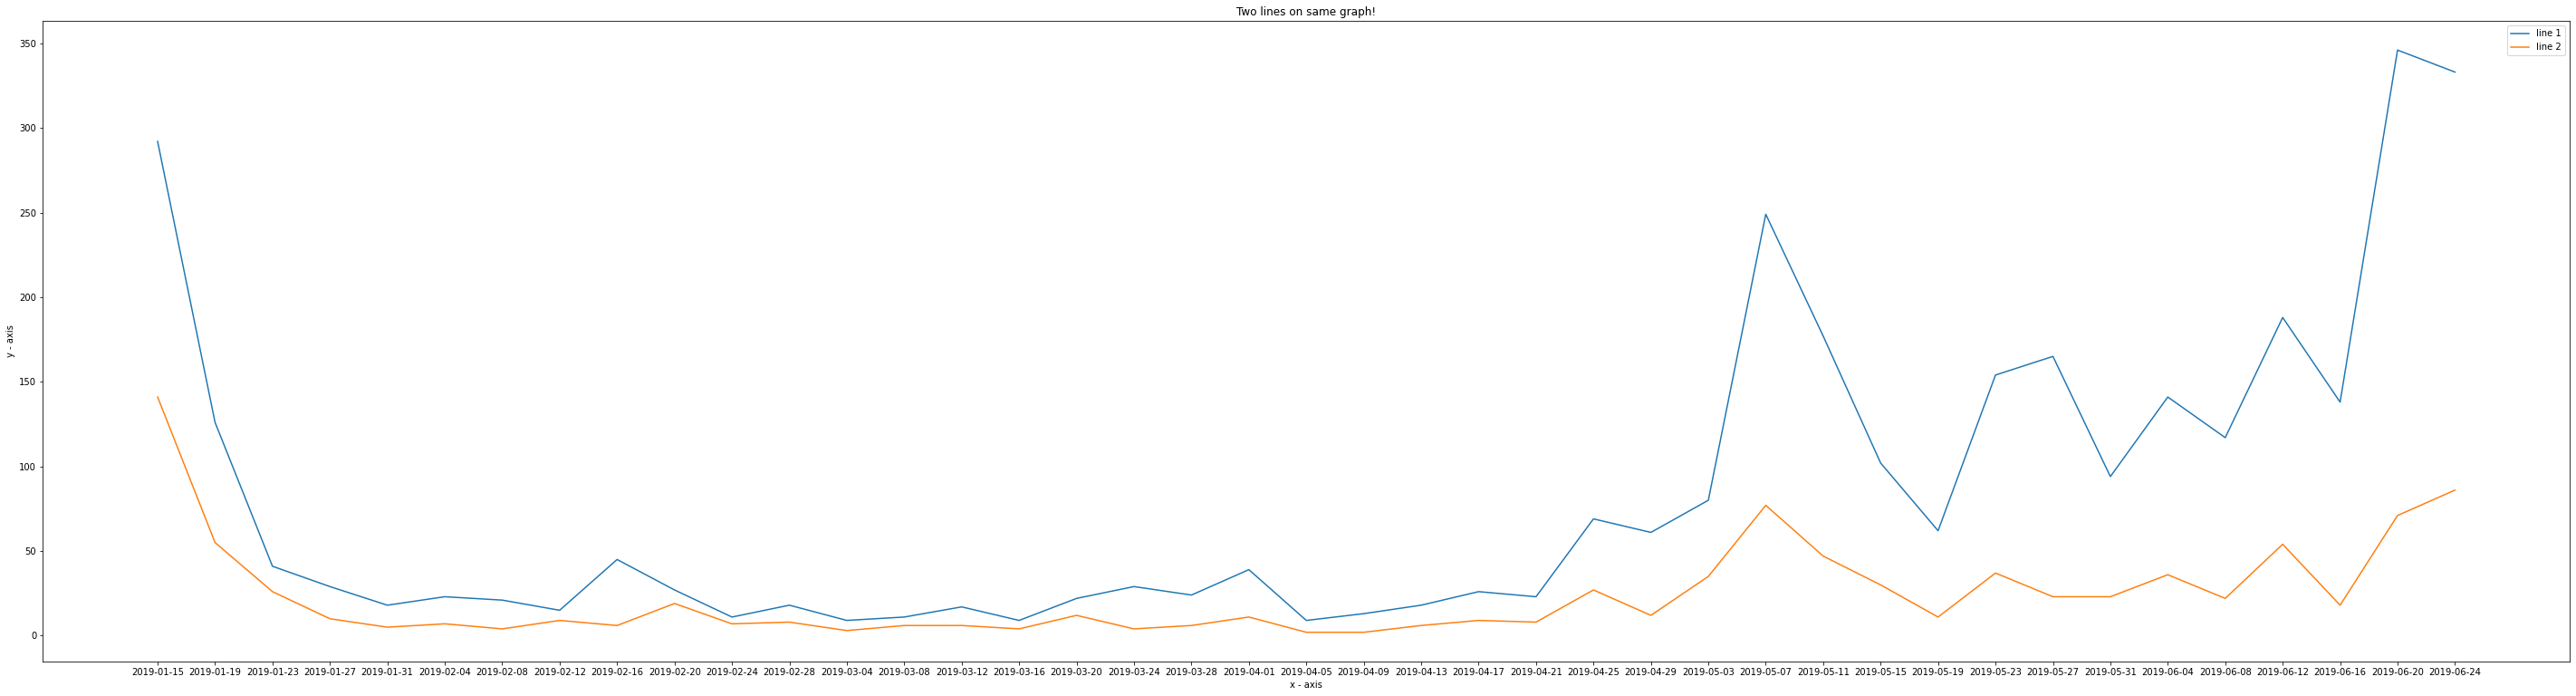

In [75]:
from matplotlib import pyplot as plt

np_arr = df_dates1_emotion.values
x = np_arr[:,0]

y_positive = np_arr[:,1]
y_negative = np_arr[:,2]

plt.figure(figsize=(50, 13))

plt.plot(x, y_positive, label = "line 1")
plt.plot(x, y_negative, label = "line 2")

plt.xlabel('x - axis')
plt.xticks(x)

plt.ylabel('y - axis')

plt.title('Two lines on same graph!')
plt.legend()
plt.savefig('plot.png')
plt.show()

#### Pierwszy zwiastun -> 2019-1-15
#### Premiera -> 2019-6-26
Więcej wypłaszczonej powierzchni w porównaniu do poprzednika.

#### Chmura tagów:

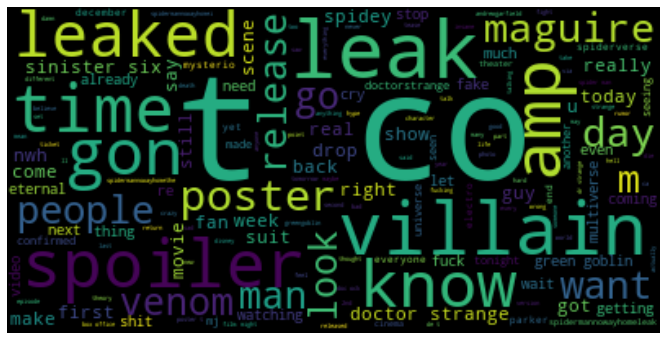

In [76]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Sporo podobnych słów jak u poprzednika
Jest to druga część ,a już się pojawiają słowa które bardziej się kojarzą z trzecią częścią co jest trochę dziwne, jak "greeb goblin", "doctor strange", "venom"

## Analiza "spider-man homecoming" pierwsza część serii.
#### Teraz tylko chmura tagów i wykres czasowy.

#### Funkcja pobierająca tweety.

In [78]:
def get_tweets3(start_day, end_day):
    query = f'(#SpiderManHomecoming) lang:en until:{end_day} since:{start_day}'
    tweets = []
    limit = 600

    for tweet in sns.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.content])

    return pd.DataFrame(tweets, columns=['Date', 'Tweet'])

#### Tworzenie listy dat, które analizujemy
#### od 2016/12/6 -> pierwszy trailer
#### do 2017/7/7 -> premiera
#### 7 miesięcy i 1 dzień mamy tutaj najdłuższy okres dzielący pierwszy zwiastun i premiera.

In [95]:
start_date = date(2016, 12, 6)
end_date = date(2017, 7, 7)

dates = pd.date_range(start_date, end_date ,freq='4d')

#### Pobieranie tweetów.

In [59]:
# df_dates_with_tweets = pd.DataFrame(columns=['Date', 'Tweet'])
#
# for val in dates:
#     start_date = val.date()
#     end_date = start_date + timedelta(days=1)
#
#     # pobieramy tweety z danego dnia
#     temp_tweets = get_tweets3(start_date, end_date)
#
#     # dodajemy te tweety do dataFrama
#     df_dates_with_tweets = pd.concat([df_dates_with_tweets, temp_tweets])
#
# print("done")
# df_dates_with_tweets.to_csv('spiderTweets3.csv')

done


##### Ilość tweetów: 10 444.
##### Ta sama funkcja pobierająca.
##### Tym razem więcej niż u poprzednika chociaż tutaj okres z którego były pobierane tweety był o 2 miesiące dłuższy.
##### Przy drugiej części udało się puki, co najmniej pobrać tweetów.
##### Napewno puki co przy trzeciej części popularność tego tematu na tweeterze była największa.

#### Dzielenie na pozytywne i negatywne tweety.

In [80]:
df_dates_with_tweets = pd.read_csv ('spiderTweets3.csv')
df_dates1_emotion = pd.DataFrame(columns=['Date', 'Number of positive tweets', 'Number of negative tweets'])

# df_dates1_emotion uzupełniam datami z lista dat
for val in dates:
    df_dates1_emotion.loc[len(df_dates1_emotion.index)] = [val.date(), 0, 0]

# iteruje po df_dates1_emotion by dla każdej daty znaleść liczbe pozytywnych i negatywnych tweetów
for index in df_dates1_emotion.index:
    temp_date = df_dates1_emotion.at[index, 'Date']

    # iteruje po tweetach i znajduje tweety z tego dnia
    for j in df_dates_with_tweets.index:
        tweet_date = df_dates_with_tweets.at[j, 'Date'].split(" ")[0]

        if temp_date.strftime("%Y-%m-%d") == tweet_date:
            # sprawdzamy czy tweet jest pozytywny czy negatywny

            curr_tweet = df_dates_with_tweets.at[j, 'Tweet']
            result = sentiment_scores(curr_tweet)

            if result == "Positive":
                df_dates1_emotion.at[index, 'Number of positive tweets'] += 1
            elif result == "Negative":
                df_dates1_emotion.at[index, 'Number of negative tweets'] += 1

#### Lematyzacja

In [81]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

#### Wykres tweetów w czasie.

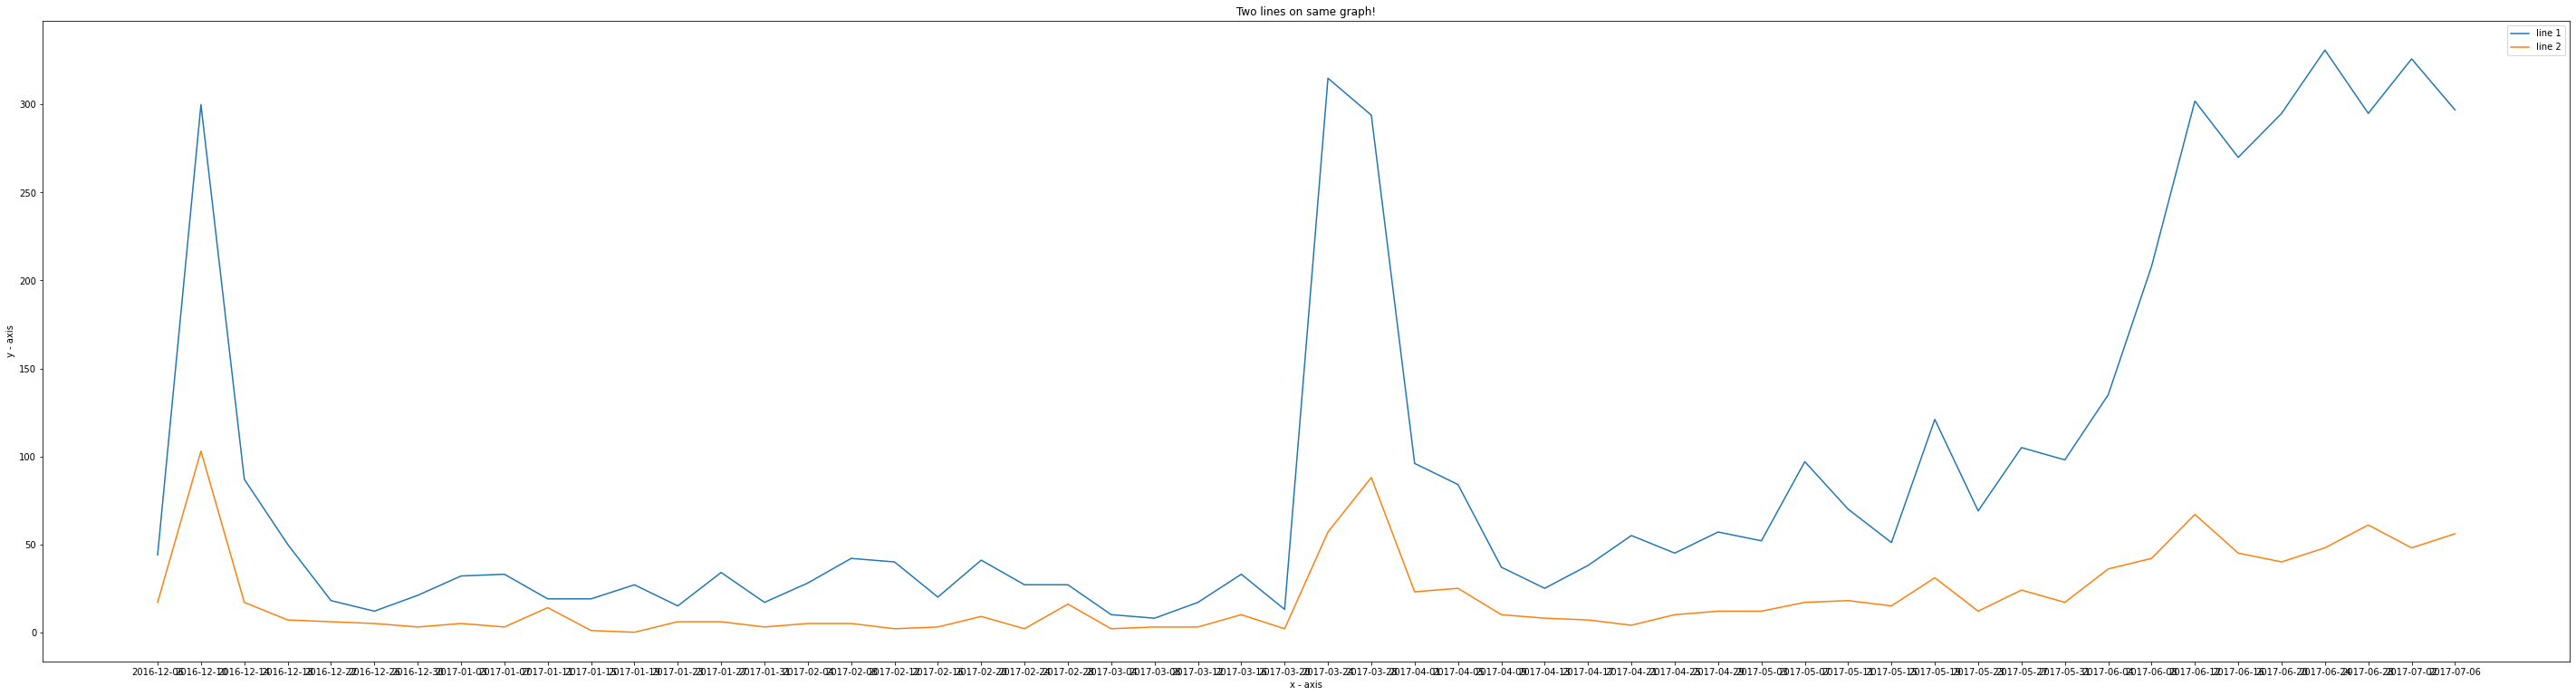

In [82]:
from matplotlib import pyplot as plt

np_arr = df_dates1_emotion.values
x = np_arr[:,0]

y_positive = np_arr[:,1]
y_negative = np_arr[:,2]

plt.figure(figsize=(50, 13))

plt.plot(x, y_positive, label = "line 1")
plt.plot(x, y_negative, label = "line 2")

plt.xlabel('x - axis')
plt.xticks(x)

plt.ylabel('y - axis')

plt.title('Two lines on same graph!')
plt.legend()
plt.savefig('plot.png')
plt.show()

#### od 2016/12/6 -> pierwszy trailer
#### do 2017/7/7 -> premiera
#### Ponownie sporo wypłaszczonej części wykresu, choć chyba mniej niż w przypadku drugiej części.

#### Chmura tagów.

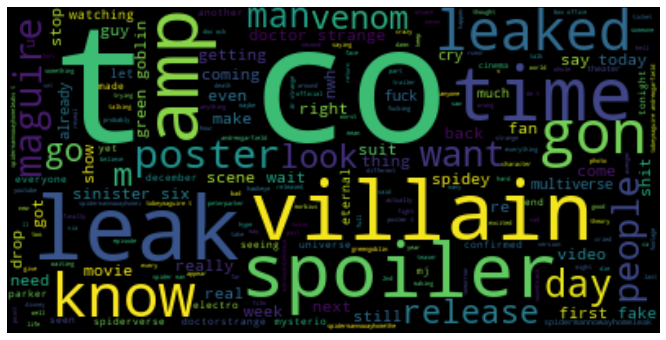

In [83]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Ponownie podobne słowa jak w poprzednich przypadkach.
#### Ponownie częste występywanie słów bardziej powiązanych z dalszymi częściami np. "maguire", "venom"
#### ciekawe.

#### Jeżeli chodzi o pierwszą i drugą część, trudno powiedzieć, która budziła więcej emocji, ale na pewno przy trzeciej części widać dużą zmianę.